In [20]:
import copy
import pandas as pd

import trainer
from utils import models, losses

In [11]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [12]:
means = {}

for i, feat_name in enumerate(trainer.Trainer.y_names):
    series = trainer.Trainer.pd_y.iloc[:, i]
    means[feat_name] = (series[~series.isna()] > 0).mean()

print(pd.Series(means))

Eq       0.522965
FI       0.474488
Macr     0.463784
Cmdty    0.517755
FX       0.484977
dtype: float64


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [03:02<00:00,  4.57s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [07:43<00:00, 11.58s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [02:48<00:00,  4.22s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [08:20<00:00, 12.52s/epoch]


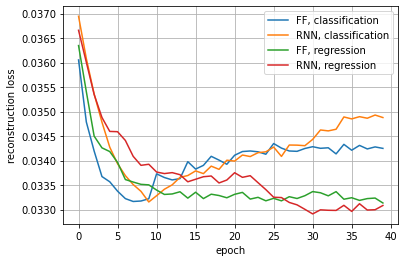

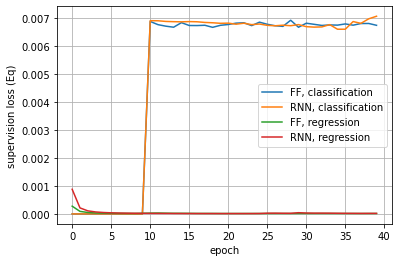

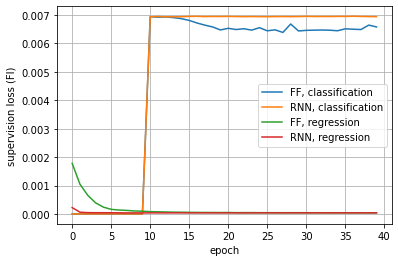

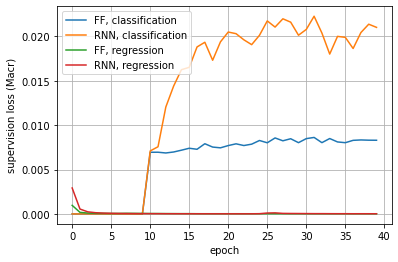

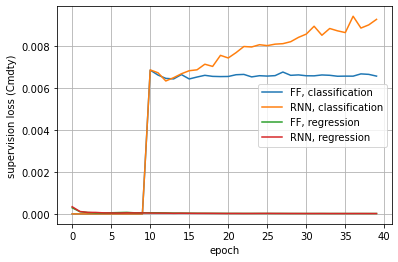

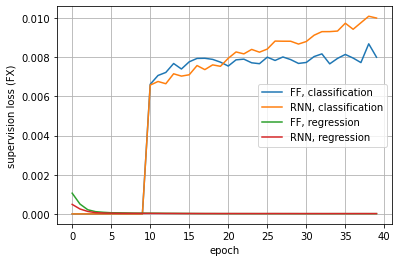

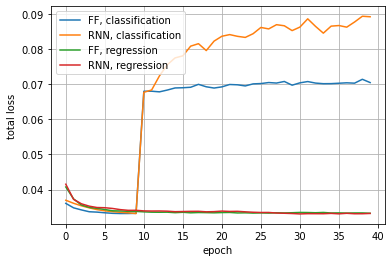

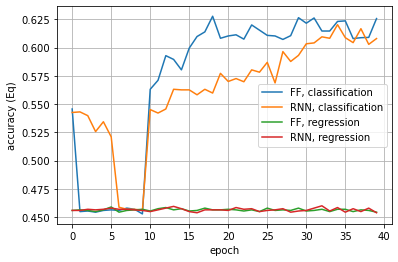

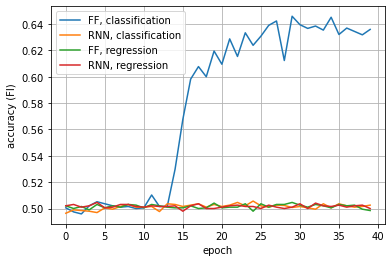

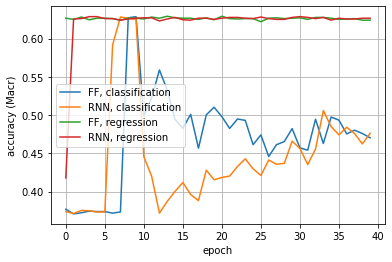

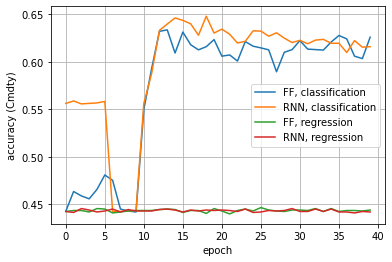

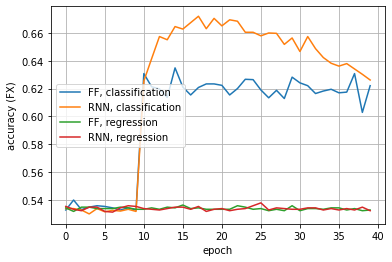

In [13]:
model_dicts = ({'name': 'FF', 'model': {}},
               {'name': 'RNN', 'model': dict(encoder_class = models.RNNEncoder,
                                             sequential = True,
                                             encoder_params = dict(input_size = 1005,
                                                                   hidden_size = 5,
                                                                   num_layers = 1)),
                              'training': {'loss': losses.loss_fixedW_RNNencdec}}
              )

hyperparams = []
for name, cls in zip(('classification', 'regression'), (True, False)):
    for model_dict in model_dicts:
        curr_dict = copy.deepcopy(model_dict)
        curr_dict['model']['classification'] = cls
        curr_dict['name'] += ', ' + name
        hyperparams.append(curr_dict)

trainer.compare_runs(*hyperparams, exp_name = 'experiment_01')

In [18]:
pd.read_csv('experiments\\experiment_01\\results.csv', index_col = 0)

,accuracy (Eq),accuracy (FI),accuracy (Macr),accuracy (Cmdty),accuracy (FX),correlation (Eq),correlation (FI),correlation (Macr),correlation (Cmdty),correlation (FX)
"FF, classification",0.625000,0.633594,0.464844,0.626563,0.626563,0.256339,0.363321,-0.022997,0.336142,0.336220
"RNN, classification",0.607031,0.501563,0.475781,0.615625,0.626563,0.238542,-0.025264,0.034647,0.291203,0.331860
"FF, regression",0.543750,0.498437,0.373437,0.557031,0.466406,-0.096127,-0.003994,-0.105410,-0.065127,0.012103
"RNN, regression",0.543750,0.498437,0.373437,0.557031,0.466406,0.022518,-0.076533,0.116266,-0.008745,-0.059333


In [19]:
from torch.optim import lr_scheduler

Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [03:03<00:00,  4.59s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [03:05<00:00,  4.64s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [03:29<00:00,  5.23s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [05:36<00:00,  8.42s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [04:02<00:00,  6.06s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [04:21<00:00,  6.54s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [02:37<00:00,  3.95s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [02:05<00:00,  3.14s/epoch]


Training on 5294 examples
Testing on 1280 examples


100%|██████████| 40/40 [02:43<00:00,  4.09s/epoch]


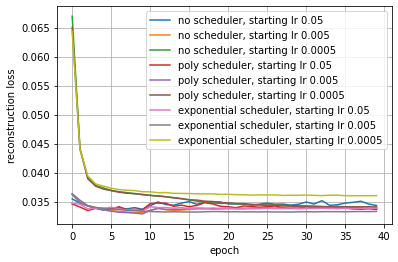

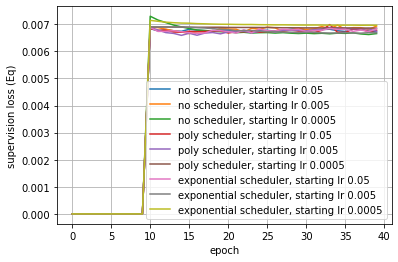

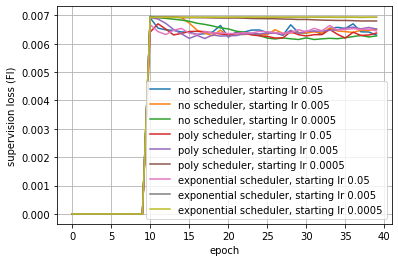

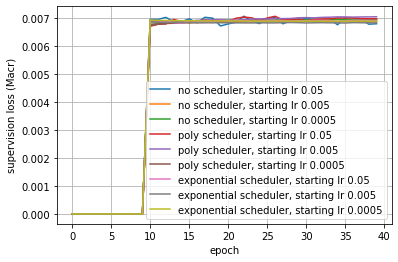

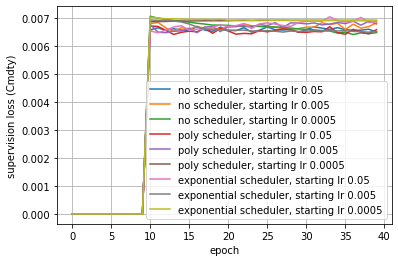

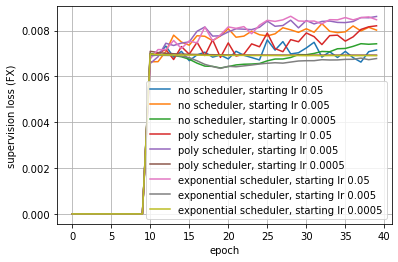

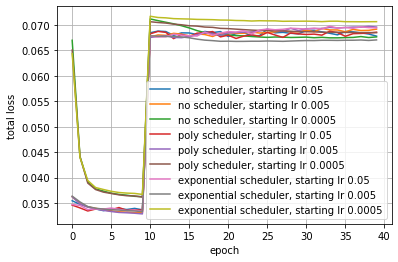

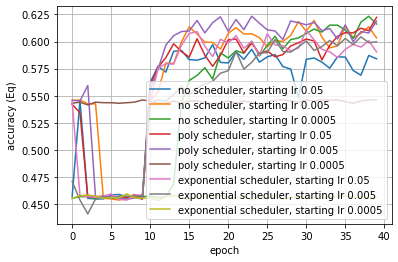

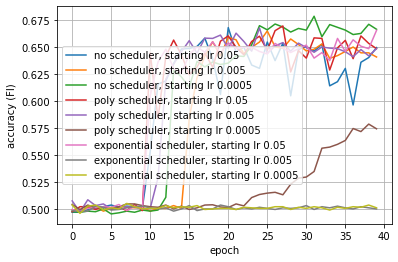

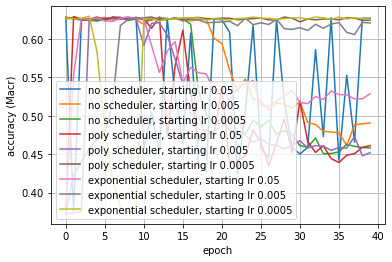

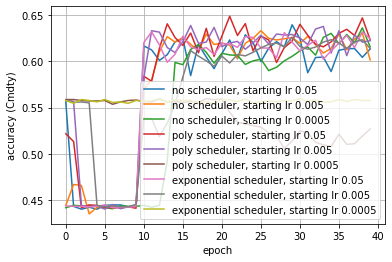

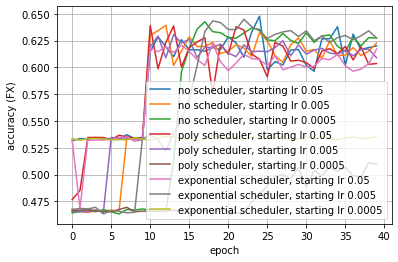

In [26]:
lrs = (0.05, 0.005, 0.0005)
schedulers = (('no', None),
              ('poly', dict(type = lr_scheduler.PolynomialLR,
                            params = dict(total_iters = 40,
                                          power = 0.9))),
               ('exponential', dict(type = lr_scheduler.ExponentialLR,
                                    params = dict(gamma = 0.01 ** (1 / 40))))
              )

hyperparams = [dict(name = f'{name} scheduler, starting lr {lr}', training = dict(lr_scheduler = scheduler_params, lr = lr))
               for name, scheduler_params in schedulers for lr in lrs]
trainer.compare_runs(*hyperparams, exp_name = 'lr_scheduler_exp')

In [27]:
pd.read_csv('experiments\\lr_scheduler_exp\\results.csv', index_col = 0)

,accuracy (Eq),accuracy (FI),accuracy (Macr),accuracy (Cmdty),accuracy (FX),correlation (Eq),correlation (FI),correlation (Macr),correlation (Cmdty),correlation (FX)
"no scheduler, starting lr 0.05",0.585156,0.654687,0.626563,0.624219,0.621094,0.220374,0.376059,0.016885,0.332377,0.336390
"no scheduler, starting lr 0.005",0.614844,0.647656,0.483594,0.623437,0.625781,0.244723,0.374284,0.013051,0.330210,0.324847
"no scheduler, starting lr 0.0005",0.622656,0.668750,0.447656,0.628906,0.624219,0.244946,0.402551,0.022998,0.375448,0.332923
"poly scheduler, starting lr 0.05",0.611719,0.660156,0.453906,0.635938,0.614062,0.227901,0.380809,0.008639,0.379389,0.345992
"poly scheduler, starting lr 0.005",0.622656,0.650781,0.455469,0.621875,0.616406,0.245438,0.372112,0.035167,0.337545,0.307163
"poly scheduler, starting lr 0.0005",0.546875,0.582812,0.626563,0.513281,0.507031,0.117093,0.305828,0.111766,-0.023562,-0.040936
"exponential scheduler, starting lr 0.05",0.606250,0.653125,0.514062,0.624219,0.611719,0.257110,0.381711,-0.033792,0.322674,0.324917
"exponential scheduler, starting lr 0.005",0.613281,0.501563,0.618750,0.617188,0.628906,0.223128,0.102114,-0.063837,0.353137,0.351576
"exponential scheduler, starting lr 0.0005",0.456250,0.501563,0.626563,0.557031,0.533594,0.143869,-0.056172,0.020293,0.033824,0.182289
